In [406]:
import numpy as np
import matplotlib.pyplot as plt

# Coordinate Descent

In [ ]:
def objective(X,y,beta,lam):
    obj = (1/2)*np.linalg.norm(y - X@beta, 2)**2 + lam*np.linalg.norm(beta, 1)
    return obj

In [407]:

#coordinatewise gradient for lasso regression

def compute_coordinate_grad(X,y,beta,coordinate,lam):
    """
    INPUT
    X...Data Matrix
    Y...Targets
    coordinate...direction which will be optimized
    lam...lambda
    """
    
    # Dimensions
    n,p = X.shape
    
    # j-th column of X
    x_j = X[:,coordinate]
    
    # j-th element of beta
    beta_j = beta[coordinate]
    
    # Regularizer
    reg = lam*np.sign(beta_j)
    
    # Compute gradient
    grad = -x_j@(y-X@beta) + reg
    
    # Return results
    return grad

In [432]:
def coordinate_descent(X, y, beta_0, lam, alpha, num_epochs, decr = None, accelerate = None):
    """
    INPUT
    X...Data Matrix
    Y...Targets
    beta_0...initial beta vector
    alpha...learning rate
    num_epochs...number of epochs
    decr...Parameter to decrease learning rate in each epoch
    accelerate...Nesterov acceleration parameter
    """
    # Get Dimensions of data and prepare beta values for acceleration
   
    n,p = X.shape 
    beta = beta_0.copy()
    beta_old = beta_0.copy()
    
    # Initialize empty objective list
    
    obj = []
    obj.append(objective(X, y, beta_0, lam))   
    
    # Iterate over epochs
    
    for epoch in range(num_epochs):
        
        # Sample coordinates for current epoch
        
        ind = np.random.permutation(p)
        
        if accelerate is not None:
            
            # Nesterov if accelerate is True
            
            beta_new = beta.copy()  
            beta_temp = beta + accelerate * (beta - beta_old)
            
            for j in ind:
                
                # Compute gradient at accelerated point
                
                grad = compute_coordinate_grad(X, y, beta_temp, coordinate = j, lam = lam)
                
                # update j-th component of beta
                
                beta[j] = beta_temp[j] - alpha*grad
            beta_old = beta_new.copy() 
            
        else:
            
            #regular Coordinate descent
            
            for j in ind:
                
                grad = compute_coordinate_grad(X, y, beta, coordinate = j, lam = lam)
                beta[j] -= alpha*grad
        
        # append current objective
        
        obj.append(objective(X,y,beta,lam))
        
        # Adapt learning rate if decr = True
        
        if decr is not None:
            
            alpha *= decr
            
    return obj, beta

# Proximal Gradient Descent

In [434]:
# Soft Threshold Operator

def soft_thresh(beta, lam):
    """
    INPUT
    beta...Vector beta
    lam...lambda
    """
    
    res = np.zeros_like(beta)
    p = len(beta)
    
    # adjust beta according to formula
    
    for i in range(p):
        if beta[i] < -lam: 
            res[i] = beta[i] + lam
        elif np.abs(beta[i]) < lam:
            res[i] = 0
        elif beta[i] > lam:
            res[i] = beta[i] - lam
    return res

In [435]:
def proximal_gradient_descent(X, y, beta_0, lam, alpha, num_epochs, decr = None, accelerate = None):
    """
    INPUT
    X...Data Matrix
    Y...Targets
    beta_0...initial beta vector
    alpha...learning rate
    num_epochs...number of epochs
    decr...Parameter to decrease stepsize in each epoch
    accelerate...Nesterov acceleration parameter
    """
       
    n,p = X.shape
    beta = beta_0.copy()
    beta_old = beta_0.copy()
    
    # initialize objective list
    
    obj = []
    obj.append(objective(X, y, beta_0, lam))    
    
    # Iterate over epochs
    
    for epoch in range(num_epochs):
        
        # Nesterov if accelerate = True
        
        if accelerate is not None:
            
            beta_new = beta.copy()  
            beta_temp = beta + accelerate * (beta - beta_old)
            content = beta_temp + alpha*X.T@(y - X@beta)
            beta = soft_thresh(content, lam*alpha)
            beta_old = beta_new.copy()
            
        # updating beta with soft threshold operator according to formula
        
        else:
            content = beta + alpha*X.T@(y - X@beta)
            beta = soft_thresh(content, lam*alpha)
        
        # append cunrrent objective
        
        obj.append(objective(X, y, beta, lam))
        
        # adapt learnign rate if decr = True
        
        if decr is not None:
            alpha *= decr
            
    return obj, beta

# Comparison between the methods

 We use the **California Housing** dataset from sklearn

In [487]:
from sklearn.datasets import fetch_california_housing

X,y = fetch_california_housing(return_X_y = True)

# scaling the data

X = X / (np.linalg.norm(X,axis = 0))

print(X.shape)

(20640, 8)


## Coordinate Descent vs. Proximal Gradient Descent

5751743.57432189
5751674.930986824


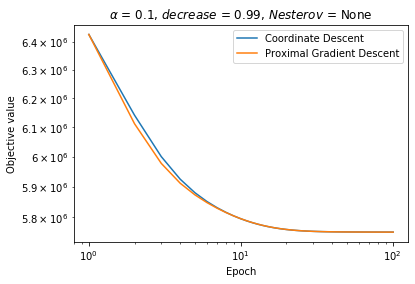

In [560]:
# set seed

np.random.seed(2022)

# define all parameters

num_epochs = 100

beta_0 = np.zeros(X.shape[1])

alpha = 0.1

lam = 0.1

accelerate = None

decr = 0.99

# run the two methods, both accelerated and not accelerated

obj1, beta1 = coordinate_descent(X, y, beta_0, lam, alpha, num_epochs, decr, accelerate)

obj2, beta2 = proximal_gradient_descent(X, y, beta_0, lam, alpha, num_epochs, decr, accelerate)



# Plot the four resulting objectives

fig, ax = plt.subplots()

xx = np.arange(1,num_epochs + 2)

ax.plot(xx, obj1, label = "Coordinate Descent")
ax.plot(xx, obj2, label = "Proximal Gradient Descent")

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("Objective value")
plt.title(r"$\alpha$ = {}, $decrease$ = {}, $Nesterov$ = {} ".format(alpha, decr, accelerate))

#comparison of minimal objective value
print(np.min(obj1))
print(np.min(obj2))

5750626.732405521
5750624.805454258


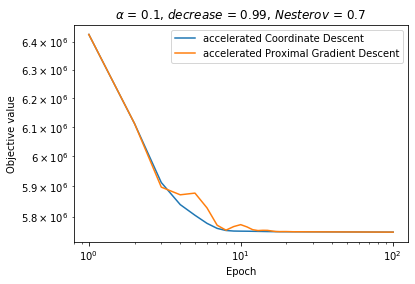

In [564]:
# set seed

np.random.seed(2022)

# define all parameters

num_epochs = 100

beta_0 = np.zeros(X.shape[1])

alpha = 0.1

lam = 0.1

accelerate = 0.7

decr = 0.99

# run the two methods, both accelerated and not accelerated

obj1, beta1 = coordinate_descent(X, y, beta_0, lam, alpha, num_epochs, decr, accelerate)

obj2, beta2 = proximal_gradient_descent(X, y, beta_0, lam, alpha, num_epochs, decr, accelerate)



# Plot the four resulting objectives

fig, ax = plt.subplots()

xx = np.arange(1,num_epochs + 2)

ax.plot(xx, obj1, label = "accelerated Coordinate Descent")
ax.plot(xx, obj2, label = "accelerated Proximal Gradient Descent")

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("Objective value")
plt.title(r"$\alpha$ = {}, $decrease$ = {}, $Nesterov$ = {} ".format(alpha, decr, accelerate))

#comparison of minimal objective value
print(np.min(obj1))
print(np.min(obj2))

## Coordinate Descent vs. accelerated Proximal Gradient Descent

In [ ]:
# set seed

np.random.seed(2022)

# define all parameters

num_epochs = 100

beta_0 = np.zeros(X.shape[1])

alpha = 0.1

lam = 0.1

accelerate = 0.

decr = 0.99

# run the two methods, both accelerated and not accelerated

obj1, beta1 = coordinate_descent(X, y, beta_0, lam, alpha, num_epochs, decr, accelerate)

obj2, beta2 = proximal_gradient_descent(X, y, beta_0, lam, alpha, num_epochs, decr, accelerate)


# Plot the four resulting objectives

fig, ax = plt.subplots()

xx = np.arange(1,num_epochs + 2)

ax.plot(xx, obj1, label = "Coordinate Descent")
ax.plot(xx, obj2, label = "Proximal Gradient Descent")

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("Objective value")


#comparison of minimal objective value
print(np.min(obj1))
print(np.min(obj2))

5749639.065837145
5749300.374021249
5749678.560194378
5749300.007732601


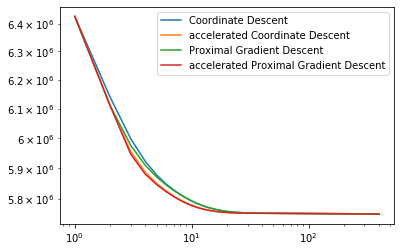

In [536]:
# set seed

np.random.seed(2022)

# define all parameters

num_epochs = 400

beta_0 = np.zeros(X.shape[1])

alpha = 0.1

lam = 0.1

accelerate = 0.2

decr = 0.99

# run the two methods, both accelerated and not accelerated

obj1, beta1 = coordinate_descent(X, y, beta_0, lam, alpha, num_epochs, decr, accelerate = None)

obj2, beta2 = coordinate_descent(X, y, beta_0, lam, alpha, num_epochs, decr, accelerate)

obj3, beta3 = proximal_gradient_descent(X, y, beta_0, lam, alpha, num_epochs, decr, accelerate = None)

obj4, beta4 = proximal_gradient_descent(X, y, beta_0, lam, alpha, num_epochs, decr, accelerate)


# Plot the four resulting objectives

fig, ax = plt.subplots()

xx = np.arange(1,num_epochs + 2)

ax.plot(xx, obj1, label = "Coordinate Descent")
ax.plot(xx, obj2, label = "accelerated Coordinate Descent")
ax.plot(xx, obj3, label = "Proximal Gradient Descent")
ax.plot(xx, obj4, label = "accelerated Proximal Gradient Descent")
plt.legend()
plt.xscale("log")
plt.yscale("log")

#comparison of minimal objective value
print(np.min(obj1))
print(np.min(obj2))
print(np.min(obj3))
print(np.min(obj4))